<a href="https://colab.research.google.com/github/huma1995/statistics/blob/main/Day_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Day 2. Statistics in Single Cell RNA seq data**

We will use R for the remainder of this course, to set your google co lab to R language, change runtime type from Python to R.

We can't mount google drive to co-lab in R runtimes, so upload the X.csv, obs.csv and var.csv to the session storage.

(File icon on the left, then document with arrow on it)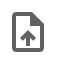

Be aware that if the runtime expires, you will have to reupload these files.
You can avoid your runtime expiring by keeping the co-lab notebook as a separate webpage.

**1. Install and load the required packages**

In [17]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("limma")
install.packages('ggrepel')
install.packages("WebGestaltR")
install.packages("ggpubr")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.20 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'limma'”
Old packages: 'bit', 'httr2', 'later', 'promises', 'usethis'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’



In [18]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(limma)
library(ggrepel)
library(WebGestaltR)
library(ggpubr)

**1. Read in the 3 csv files**
* X is the expression matrix
* obs is the observations/metadata
* var is the gene names

In [5]:
exp_data <- read.csv('/content/X.csv', header=FALSE)
metadata <-read.csv('/content/obs.csv')
var_data<- read.csv('/content/var.csv')

head(exp_data)
head(metadata)
head(var_data)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V5842,V5843,V5844,V5845,V5846,V5847,V5848,V5849,V5850,V5851
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,8.4439458,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
2,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
3,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
4,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
5,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.1083122,-0.06937566,5.3992868,-0.1775671,-0.06982737,-0.3230621
6,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621


,CellID,Patient,Author,Tissue,Disease_stage,Age,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,leiden,Celltype
,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,sc_b1_A08,33572,Hu_2020,Benign fallopian tube cells,Benign,64,1326,1326,142098,24.09182,36.65006,55.25201,86.71480,0,Secretory Epithelial-1
2,sc_b1_B06,34350,Hu_2020,Benign fallopian tube cells,Benign,50,1599,1599,273240,25.74294,34.62194,47.67201,74.23291,0,Secretory Epithelial-1
3,sc_b1_B08,34350,Hu_2020,Benign fallopian tube cells,Benign,50,2298,2298,193108,24.94614,32.24620,42.47468,62.87777,1,Secretory Epithelial-2
4,sc_b1_B11,34350,Hu_2020,Benign fallopian tube cells,Benign,50,2100,2100,195696,20.84202,29.20755,41.62834,66.75303,0,Secretory Epithelial-1
5,sc_b1_C15,34350,Hu_2020,Benign fallopian tube cells,Benign,50,1793,1793,279434,19.77569,27.73965,39.91712,66.52304,1,Secretory Epithelial-2
6,sc_b1_C18,33572,Hu_2020,Benign fallopian tube cells,Benign,64,1335,1335,328526,27.70253,36.29728,49.93090,78.92983,0,Secretory Epithelial-1


,Gene,n_cells,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,PLEKHN1,127,127,1.582620,97.21308,7212,True,0.01804155,1.833444,0.7781531,0.009044333,0.09574012
2,C1orf159,383,383,11.393461,91.59535,51920,True,0.15081387,1.673782,0.6673490,0.065633356,0.30348997
3,B3GALT6,287,287,4.430546,93.70200,20190,True,0.06731816,1.507138,0.5517003,0.032744878,0.19488919
4,FAM132A,39,39,1.260478,99.14417,5744,True,0.01762634,1.701863,0.6868375,0.007682837,0.10071693
5,SCNN1D,329,329,7.168751,92.78034,32668,True,0.10859225,1.673323,0.6670306,0.047073752,0.25428997
6,PUSL1,425,425,13.996269,90.67369,63781,True,0.15783719,2.050473,0.9287682,0.070341273,0.30717181


**2. Make the row names of exp_data be CellIDs, and the column names be gene names**

In [7]:
rownames(exp_data)<-metadata$CellID
colnames(exp_data)<-var_data$Gene

head(exp_data)

,PLEKHN1,C1orf159,B3GALT6,FAM132A,SCNN1D,PUSL1,MXRA8,LOC148413,CDK11B,LOC100129534,⋯,DNASE1L1,TAZ,PLXNA3,UBL4A,SLC10A3,GAB3,MPP1,F8,RAB39B,TMLHE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sc_b1_A08,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,8.4439458,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_B06,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_B08,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_B11,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621
sc_b1_C15,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.1083122,-0.06937566,5.3992868,-0.1775671,-0.06982737,-0.3230621
sc_b1_C18,-0.09446754,-0.216262,-0.1680179,-0.07628149,-0.1851184,-0.2289965,-0.1256334,-0.2100703,-0.1098231,-0.08605047,⋯,-0.2414715,-0.2299743,-0.1876729,-0.2382954,-0.2910066,-0.06937566,-0.3154077,-0.1775671,-0.06982737,-0.3230621


##**Initial visualisations of the data**
**1. Calculate the total number of cells per patient**


In [8]:
cells_per_patient <- metadata %>%
  group_by(Patient) %>%
  tally(name ="Total_Cells")

**2. Use ggplot to plot this as a bar graph**

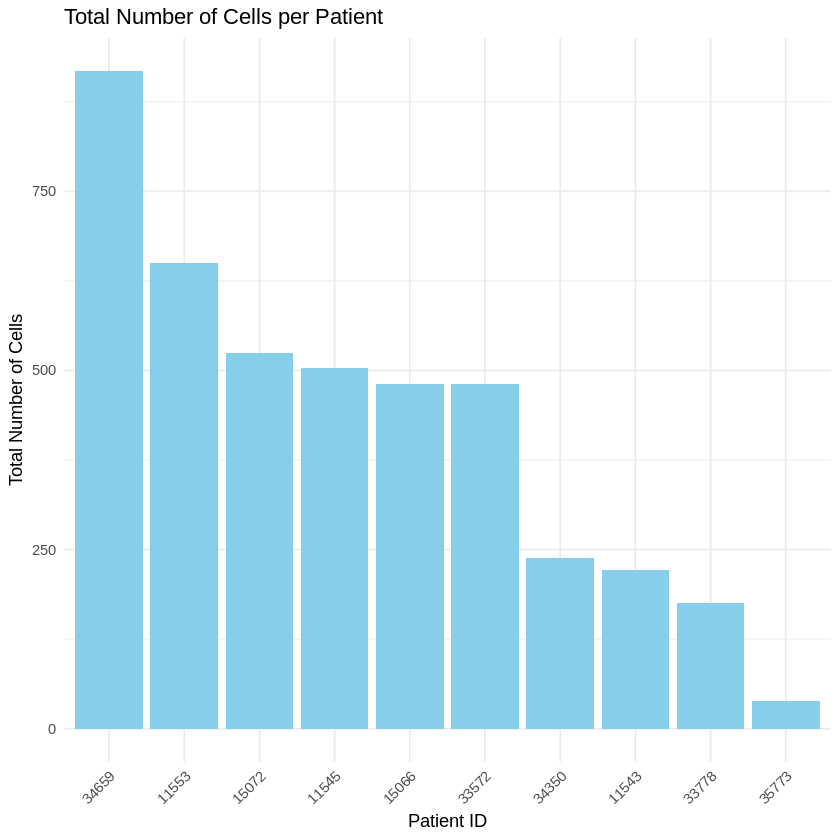

In [9]:
ggplot(cells_per_patient, aes(x = reorder(Patient, -Total_Cells), y = Total_Cells)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Total Number of Cells per Patient", x = "Patient ID", y = "Total Number of Cells") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

**3. Calculate and plot total cell counts per disease stage**

In [11]:
cells_per_stage <- metadata %>%
  group_by(Disease_stage) %>%
  tally(name ="Total_Cells")

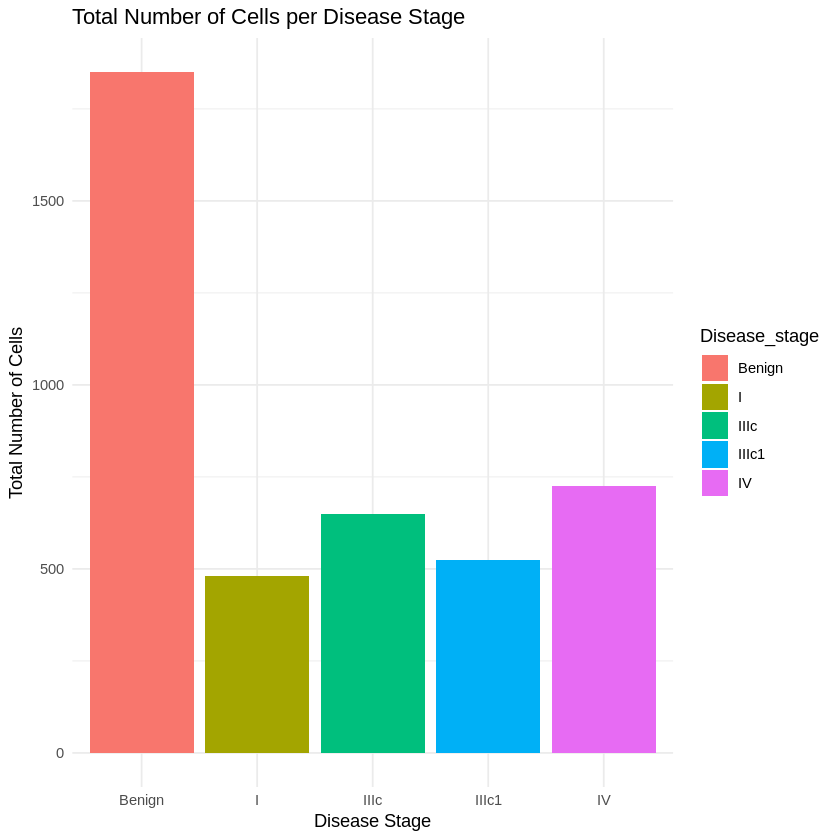

In [12]:
ggplot(cells_per_stage, aes(x = Disease_stage, y = Total_Cells, fill = Disease_stage)) +
  geom_bar(stat = "identity") +
  labs(title = "Total Number of Cells per Disease Stage", x = "Disease Stage", y = "Total Number of Cells") +
  theme_minimal()

**4. Calculate and plot counts of cell types per disease stage**

In [14]:
cell_counts <- metadata %>%
  group_by(Celltype, Disease_stage) %>%
  tally(name ="Total_Cells")

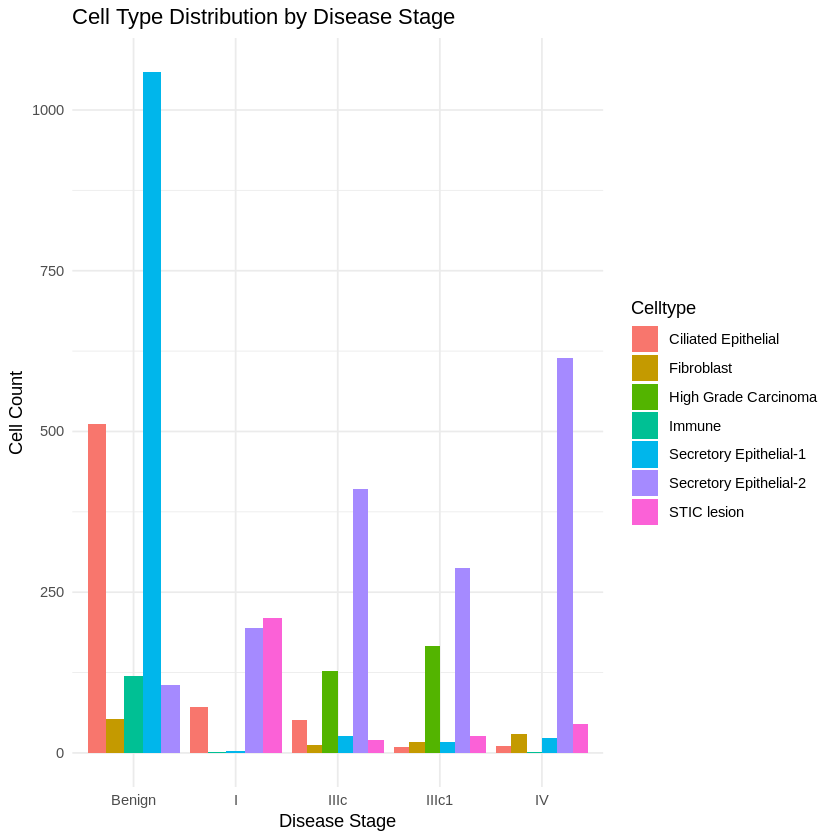

In [16]:
ggplot(cell_counts, aes(x = Disease_stage, y = Total_Cells, fill = Celltype)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Cell Type Distribution by Disease Stage", x = "Disease Stage", y = "Cell Count") +
  theme_minimal()

**5. Perform a statistical test to show if the differences in cell type proportions between disease stage are significant**

* T-test in ggplot, between disease stage and cell type


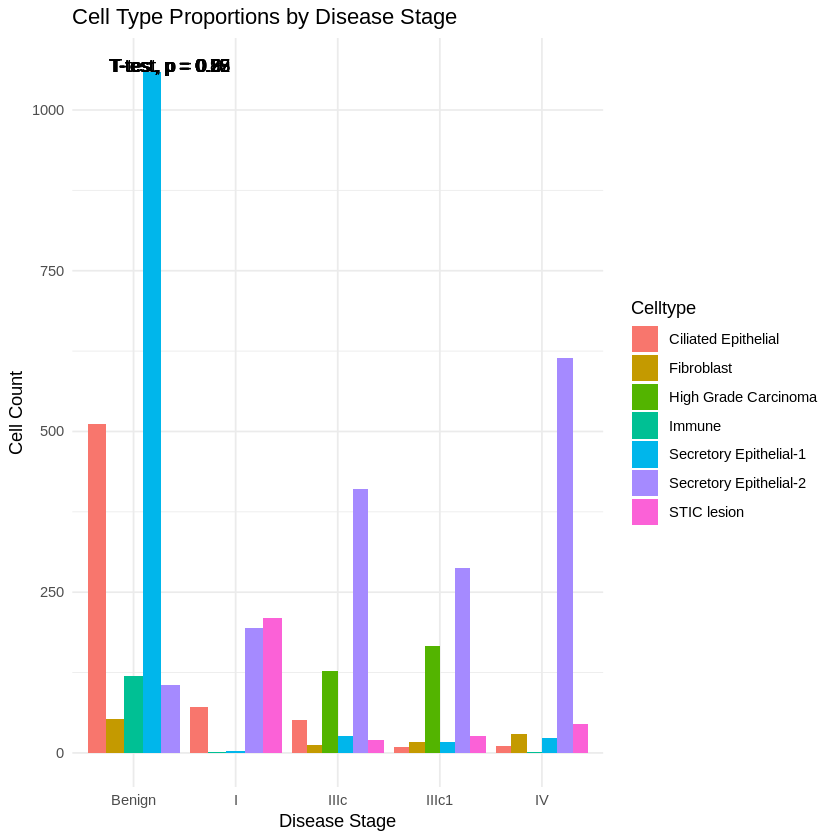

In [25]:
ggplot(cell_counts, aes(x = Disease_stage, y = Total_Cells, fill = Celltype)) +
  geom_bar(stat = "identity", position = "dodge") +
  stat_compare_means(aes(group = Disease_stage), method = "t.test") +
  labs(title = "Cell Type Proportions by Disease Stage", x = "Disease Stage", y = "Cell Count") +
  theme_minimal()


## **Differential gene expression**
* Perform a differential gene expression test between between Secretory Epithelial-1 and Secretory Epithelial-2 using the limma package

**1. Subset the metadata and expression data to the two secretory epithelial cell types**

In [23]:
secretorymeta<- subset(metadata, metadata$Celltype %in%c('Secretory Epithelial-1','Secretory Epithelial-2'))
secretoryexp<- subset(exp_data, rownames(exp_data) %in% secretorymeta$CellID)

**2.Check dimensions of secretory cell metadata and expression match, do they have the same number of cells?**


In [28]:
dim(secretorymeta)
dim(secretoryexp)

[1] 2742   15

[1] 2742 5851

**3. Transpose the expression matrix, so columns = cells and rows = genes
(this is the input format required by limma)**
* Check cell IDs match

In [29]:
secretoryexp <- t(secretoryexp)
identical(colnames(secretoryexp), secretorymeta$CellID)

[1] TRUE

**4. Perform differential gene expression test**

In [30]:
design <- model.matrix(~ Celltype, data = secretorymeta)
fit <- lmFit(secretoryexp, design)
fit <- eBayes(fit, trend = TRUE)

**5. Print top 20 differentially expressed gene**

In [32]:
top20genes <- topTable(fit, coef = 2, number = 20)
print(top20genes)

             logFC      AveExpr         t       P.Value     adj.P.Val        B
DNAJB1   1.4062627  0.142315431  49.00135  0.000000e+00  0.000000e+00 853.1227
MAFF     1.3778254  0.168383814  44.62554  0.000000e+00  0.000000e+00 739.5503
SERTAD1  1.3430332  0.124781415  42.82456 2.739357e-307 5.342660e-304 693.2463
SOD2     1.1602063  0.017821231  37.74321 1.913977e-251 2.799671e-248 564.9803
RND3     1.2265344  0.082249456  37.52431 4.395981e-249 5.144176e-246 559.5570
ZC3H12A  1.2198683  0.102495529  37.40139 9.265636e-248 9.035539e-245 556.5164
CLDN10  -1.2270969  0.128654101 -36.93004 1.072158e-242 8.961710e-240 544.8863
NR4A1    1.0871123  0.222794414  33.88127 1.655037e-210 1.210453e-207 470.9532
SLC40A1 -1.1332151  0.130464704 -33.39883 1.631700e-205 1.060787e-202 459.4833
ATF3     1.1110467  0.214488462  33.37096 3.164240e-205 1.851397e-202 458.8227
CYR61    1.1093335  0.162107924  33.21465 1.292031e-203 6.872428e-201 455.1225
NCOA7    1.1026419  0.215414113  32.39760 3.012891e-

**6. Plot a volcano plot of top 100 differentially expressed genes**

In [33]:
top_genes_df <- topTable(fit, coef = 2, number = 100)
top_genes_df$significance <- ifelse(top_genes_df$P.Value < 0.05 & abs(top_genes_df$logFC) > 1,
                                    "Significant", "Not Significant")

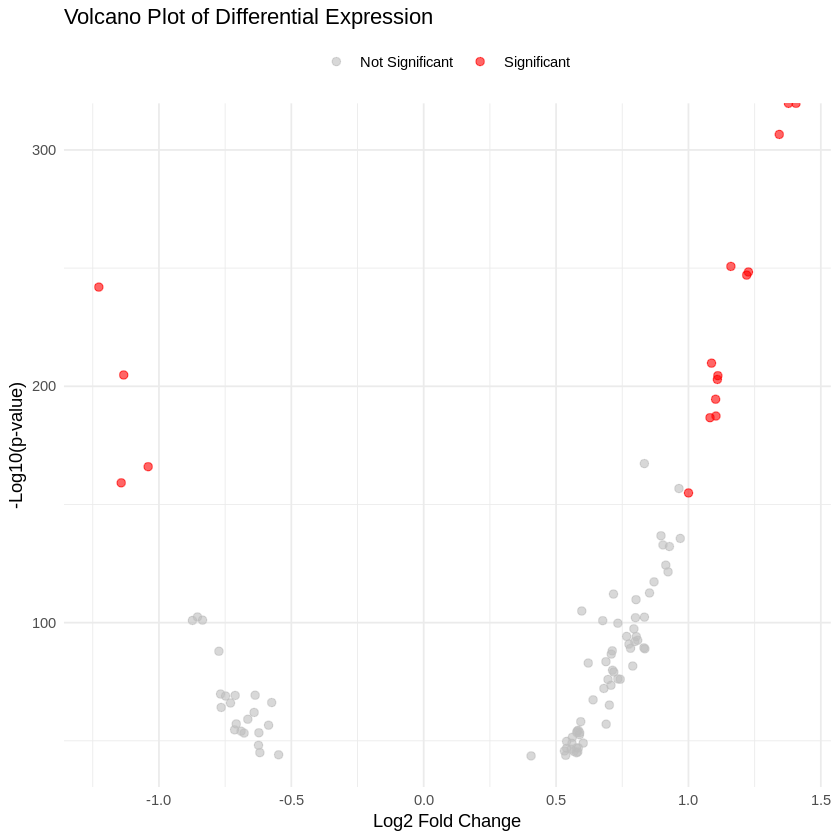

In [35]:
volcanoplot <- ggplot(top_genes_df, aes(x = logFC, y = -log10(P.Value), color = significance)) +
  geom_point(alpha = 0.6, size = 2) +
  scale_color_manual(values = c("Not Significant" = "gray", "Significant" = "red")) +
  theme_minimal() +
  labs(title = "Volcano Plot of Differential Expression",
       x = "Log2 Fold Change", y = "-Log10(p-value)") +
  theme(legend.title = element_blank()) +
  theme(legend.position = "top")

volcanoplot

**7. Add gene names to the singificantly differentially expressed genes**

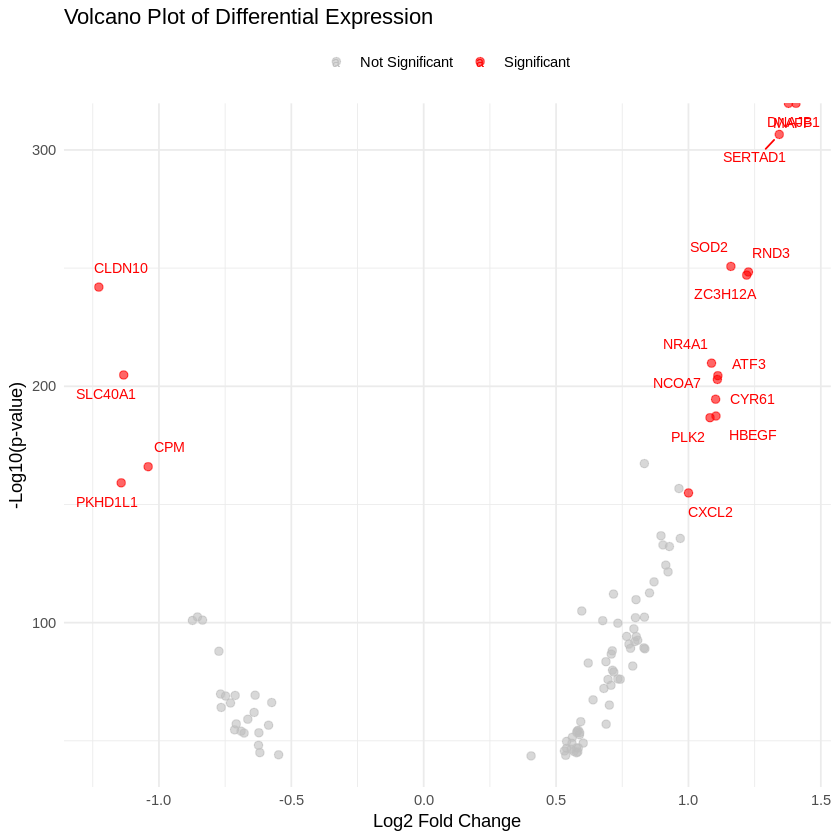

In [36]:
volcanoplotlabelled <- volcanoplot +
  geom_text_repel(aes(label = ifelse(significance == "Significant", rownames(top_genes_df), "")),
                                                       box.padding = 0.5, point.padding = 0.5,
                                                       max.overlaps = 10, size = 3)
volcanoplotlabelled

##**Gene Set Enrichment Analysis**
* We can get more information about what biological processes or pathways each cell type might be enriched for using gene set enrichment analysis
* This will use a package WebGestaltR

**1. Import the list of ranked genes from cell types we generated using Scanpy yesterday**

In [41]:
rankedgenes <- read.csv("/content/celltypemarkergenes.csv")
head(rankedgenes)


,Secretory.Epithelial.1_n,Secretory.Epithelial.1_s,Secretory.Epithelial.2_n,Secretory.Epithelial.2_s,STIC.lesion_n,STIC.lesion_s,Ciliated.Epithelial_n,Ciliated.Epithelial_s,Fibroblast_n,Fibroblast_s,Immune_n,Immune_s,High.Grade.Carcinoma_n,High.Grade.Carcinoma_s
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,CLDN10,30.74710,DNAJB1,37.68798,HLA-DRB1,25.37824,FAM183A,40.50676,TIMP3,16.25925,SRGN,18.64777,HMGA1,27.12001
2,SLC40A1,30.24609,MAFF,36.72523,HLA-DQA1,25.25888,C1orf194,40.50064,UBB,13.45883,LAPTM5,17.20337,S100A10,26.48133
3,SPARCL1,24.47402,ATF3,34.06892,HLA-DPB1,24.67608,C20orf85,40.39793,SPARC,11.99632,RGS1,16.80215,S100A6,25.13075
4,PKHD1L1,23.84137,NR4A1,33.73787,HLA-DPA1,23.77374,CAPS,40.35849,IGFBP5,11.62716,PTPRC,16.33096,KRT7,24.91474
5,SORL1,23.07276,NCOA7,33.50495,HLA-DQB1,22.30958,TPPP3,40.34295,LGALS1,11.52522,ARHGDIB,16.24919,S100A16,24.25871
6,SCGB1D2,16.61122,SERTAD1,33.20293,HSPB8,21.70216,PIFO,40.26876,DCN,11.15032,CD53,15.88344,SH3BGRL3,23.24509


**2. We will look at Secretory Epithelial-1, Secretory Epithelial-2 and STIC lesion cell clusters**
* Create  subsets of gene files for each cell type



In [42]:
SE1 <- rankedgenes[, colnames(rankedgenes) %in% c('Secretory.Epithelial.1_n', 'Secretory.Epithelial.1_s'), drop = FALSE]
SE2 <- rankedgenes[, colnames(rankedgenes) %in% c('Secretory.Epithelial.2_n', 'Secretory.Epithelial.2_s'), drop = FALSE]
STIC <- rankedgenes[, colnames(rankedgenes) %in% c('STIC.lesion_n', 'STIC.lesion_s'), drop = FALSE]


**3. Save as rank files for input to webgestalt**

In [45]:
write.table(SE1, file = "/content/SE2rankedgenes.rnk", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(SE2, file = "/content/SE2rankedgenes.rnk", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)
write.table(STIC, file = "/content/STICrankedgenes.rnk", sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

**4. Run Webgestalt GSEA for each rank file**

In [47]:
SE1Result <- WebGestaltR(
  enrichMethod = "GSEA", organism = "hsapiens",
  enrichDatabase = "pathway_KEGG", interestGeneFile = "/content/SE2rankedgenes.rnk",
  interestGeneType = "genesymbol", sigMethod = "top", topThr = 10, minNum = 5)

SE2Result <- WebGestaltR(
  enrichMethod = "GSEA", organism = "hsapiens",
  enrichDatabase = "pathway_KEGG", interestGeneFile = "/content/SE2rankedgenes.rnk",
  interestGeneType = "genesymbol", sigMethod = "top", topThr = 10, minNum = 5)

STICResult <- WebGestaltR(
  enrichMethod = "GSEA", organism = "hsapiens",
  enrichDatabase = "pathway_KEGG", interestGeneFile = "/content/STICrankedgenes.rnk",
  interestGeneType = "genesymbol", sigMethod = "top", topThr = 10, minNum = 5)

Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00020
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00040
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00062
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00072
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00130
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00220


1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
End weighted set cover...
Generate the final report...
Results can be found in the /content/Project_1733241206!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00020
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00040
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00062
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00072
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00130
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00220


1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
End weighted set cover...
Generate the final report...
Results can be found in the /content/Project_1733241438!
Loading the functional categories...
Loading the ID list...
Summarizing the uploaded ID list by GO Slim data...
Performing the enrichment analysis...


Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00020
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00040
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00062
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00072
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00130
”
Warning message in swGsea(inputDf, thresh_type = "val", perms = perNum, min_set_size = minNum, :
“score does not contain minimum number of items in set for hsa00220


1000 permutations of score complete...
Begin affinity propagation...
End affinity propagation...
Begin weighted set cover...
Remain is 0, ending weighted set cover
Generate the final report...
Results can be found in the /content/Project_1733241674!


**5. To plot a dotplot of all the results combined**
* Add a column to each result table identify cell type
* Join the results tables together

In [51]:
SE1Result$Celltype = 'Secretory Epithelial-1'
SE2Result$Celltype = 'Secretory Epithelial-2'
STICResult$Celltype = 'STIC lesion'
gsea<- SE1Result %>% bind_rows(SE2Result) %>% bind_rows(STICResult)
head(gsea)

,geneSet,description,link,enrichmentScore,normalizedEnrichmentScore,pValue,FDR,size,plotPath,leadingEdgeNum,leadingEdgeId,userId,Celltype
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,hsa04668,TNF signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04668+2920+3726+2921+330+3659+2919+6347+1906+3383+7128+3725+3627+7124+1435+5743+3569+6885+1326,0.8007991,2.182110,0,0.0000000000,54,./Project_1733241206_GSEA/hsa04668.png,18,2920;3726;2921;330;3659;2919;6347;1906;3383;7128;3725;3627;7124;1435;5743;3569;6885;1326,BIRC3;CCL2;CSF1;CXCL1;CXCL10;CXCL2;CXCL3;EDN1;ICAM1;IL6;IRF1;JUN;JUNB;MAP3K7;MAP3K8;PTGS2;TNF;TNFAIP3,Secretory Epithelial-1
2,hsa04657,IL-17 signaling pathway,http://www.kegg.jp/kegg-bin/show_pathway?hsa04657+2920+2354+2921+2919+6347+7128+8061+3934+3725+3627+7124+5743+3569+6885,0.7717292,2.020448,0,0.0006691719,41,./Project_1733241206_GSEA/hsa04657.png,14,2920;2354;2921;2919;6347;7128;8061;3934;3725;3627;7124;5743;3569;6885,CCL2;CXCL1;CXCL10;CXCL2;CXCL3;FOSB;FOSL1;IL6;JUN;LCN2;MAP3K7;PTGS2;TNF;TNFAIP3,Secretory Epithelial-1
3,hsa05323,Rheumatoid arthritis,http://www.kegg.jp/kegg-bin/show_pathway?hsa05323+2919+6347+3383+3725+3123+3127+3119+7124+3115+1435+3113+3109+3569+51561+7042+3552+3553+6387,0.7660953,2.010191,0,0.0008922292,42,./Project_1733241206_GSEA/hsa05323.png,18,2919;6347;3383;3725;3123;3127;3119;7124;3115;1435;3113;3109;3569;51561;7042;3552;3553;6387,CCL2;CSF1;CXCL1;CXCL12;HLA-DMB;HLA-DPA1;HLA-DPB1;HLA-DQB1;HLA-DRB1;HLA-DRB5;ICAM1;IL1A;IL1B;IL23A;IL6;JUN;TGFB2;TNF,Secretory Epithelial-1
4,hsa05166,Human T-cell leukemia virus 1 infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05166+467+1958+1959+894+3383+8061+3725+4609+3123+3127+3119+7494+7124+3115+8829+3113+114+3109+3569+595+7042+3554,0.6435539,1.918988,0,0.0030112736,97,./Project_1733241206_GSEA/hsa05166.png,22,467;1958;1959;894;3383;8061;3725;4609;3123;3127;3119;7494;7124;3115;8829;3113;114;3109;3569;595;7042;3554,ADCY8;ATF3;CCND1;CCND2;EGR1;EGR2;FOSL1;HLA-DMB;HLA-DPA1;HLA-DPB1;HLA-DQB1;HLA-DRB1;HLA-DRB5;ICAM1;IL1R1;IL6;JUN;MYC;NRP1;TGFB2;TNF;XBP1,Secretory Epithelial-1
5,hsa05150,Staphylococcus aureus infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05150+718+3383+3123+3127+3119+716+715+3115+629+3113+1675+3109,0.7558302,1.904697,0,0.0031228023,37,./Project_1733241206_GSEA/hsa05150.png,12,718;3383;3123;3127;3119;716;715;3115;629;3113;1675;3109,C1R;C1S;C3;CFB;CFD;HLA-DMB;HLA-DPA1;HLA-DPB1;HLA-DQB1;HLA-DRB1;HLA-DRB5;ICAM1,Secretory Epithelial-1
6,hsa05168,Herpes simplex infection,http://www.kegg.jp/kegg-bin/show_pathway?hsa05168+10482+718+6347+3725+3123+3127+3119+7124+3115+8740+3113+8863+3109+3569+6885,0.6958348,1.908003,0,0.0032120252,55,./Project_1733241206_GSEA/hsa05168.png,15,10482;718;6347;3725;3123;3127;3119;7124;3115;8740;3113;8863;3109;3569;6885,C3;CCL2;HLA-DMB;HLA-DPA1;HLA-DPB1;HLA-DQB1;HLA-DRB1;HLA-DRB5;IL6;JUN;MAP3K7;NXF1;PER3;TNF;TNFSF14,Secretory Epithelial-1


**6. Plot the dot plot**

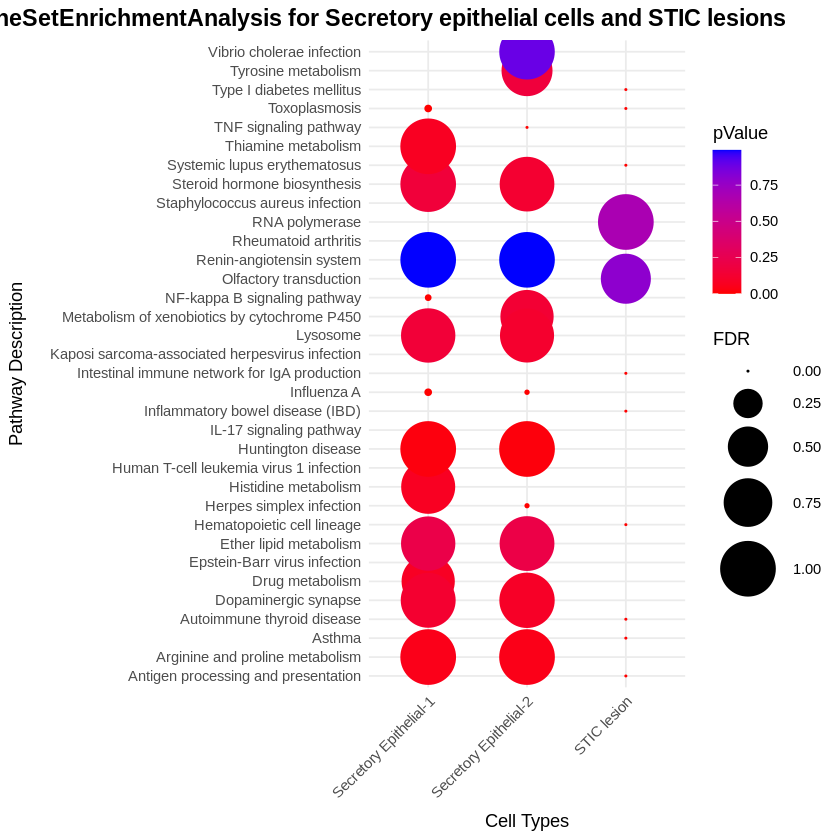

In [52]:
ggplot(gsea, aes(x = Celltype, y = description)) +
  geom_point(aes(size= FDR, color = pValue)) +
  scale_color_gradient(low = "red", high = "blue", name = "pValue") +
  scale_size_continuous(range = c(0.2, 15)) +
  theme_minimal() +
  labs(
    title = "GeneSetEnrichmentAnalysis for Secretory epithelial cells and STIC lesions",
    x = "Cell Types",
    y = "Pathway Description"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(size = 14, face = "bold", hjust = 0.8))

##**Linear regression**
* We can assess correlations in gene expression between 2 genes in one or two cell types

**1. Subset the data to secretory epithelial-1 and secretory epithelial-2 again**



In [53]:
secretorymeta<- subset(metadata, metadata$Celltype %in%c('Secretory Epithelial-1','Secretory Epithelial-2'))
secretoryexp<- subset(exp_data, rownames(exp_data) %in% secretorymeta$CellID)

**2. Create a new column in the metadata with JUNB and IER2 expression for each cell**

In [54]:
secretorymeta$JUNB<-exp_data[row.names(secretoryexp),"JUNB"]
secretorymeta$IER2<-exp_data[row.names(secretoryexp),"IER2"]


**3. Subset the secretory metadata to contain only cells with JUNB and IER2 expression equal to or greater than 0**

In [55]:
filtered_meta <- secretorymeta %>%
  filter(JUNB >= 0 & IER2 >= 0)


**4. Run the linear regression model**

In [56]:
model <- lm(JUNB ~ IER2, data = filtered_meta)
summary(model)


Call:
lm(formula = JUNB ~ IER2, data = filtered_meta)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16872 -0.33067 -0.01919  0.30638  1.32453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.54746    0.02242   24.42   <2e-16 ***
IER2         0.33560    0.02261   14.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4385 on 1450 degrees of freedom
Multiple R-squared:  0.1319,	Adjusted R-squared:  0.1313 
F-statistic: 220.3 on 1 and 1450 DF,  p-value: < 2.2e-16


**5.Create a scatter plot of JUNB expression vs IER2 expression**

`geom_smooth()` using formula = 'y ~ x'


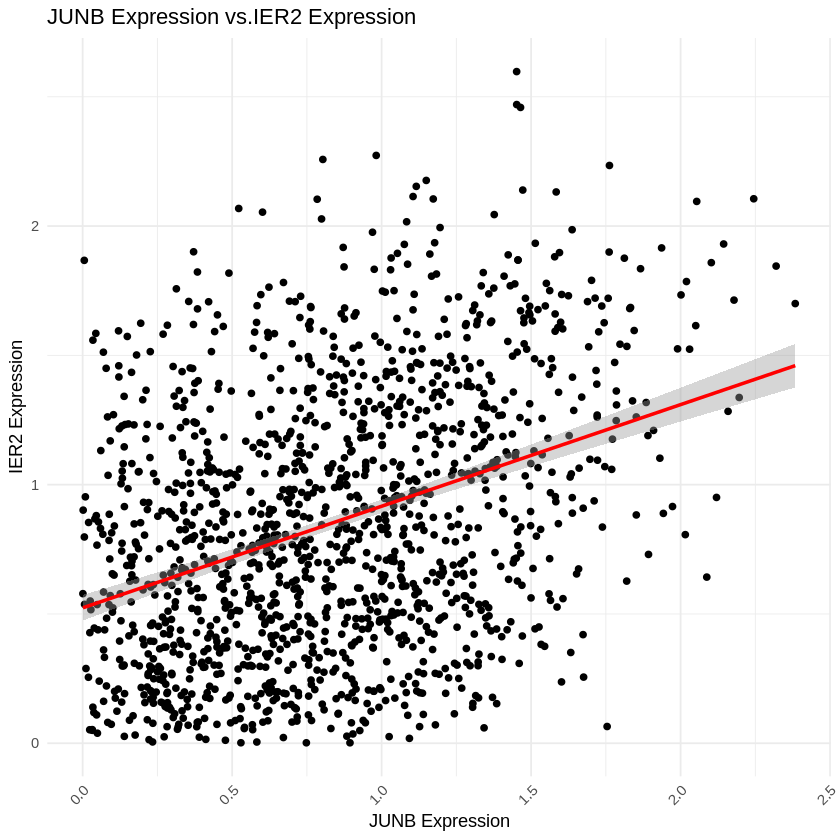

In [57]:
geneexpression <- ggplot(filtered_meta, aes(x = JUNB, y = IER2)) +
                geom_point() +
                geom_smooth(method = "lm", color = "red", se = TRUE) +
                theme_minimal() +
                labs(title = "JUNB Expression vs.IER2 Expression",
                x = "JUNB Expression",
                y = "IER2 Expression") +
                theme(axis.text.x = element_text(angle = 45, hjust = 1))
geneexpression

**6. Add the Rsquared value onto the plot**

`geom_smooth()` using formula = 'y ~ x'


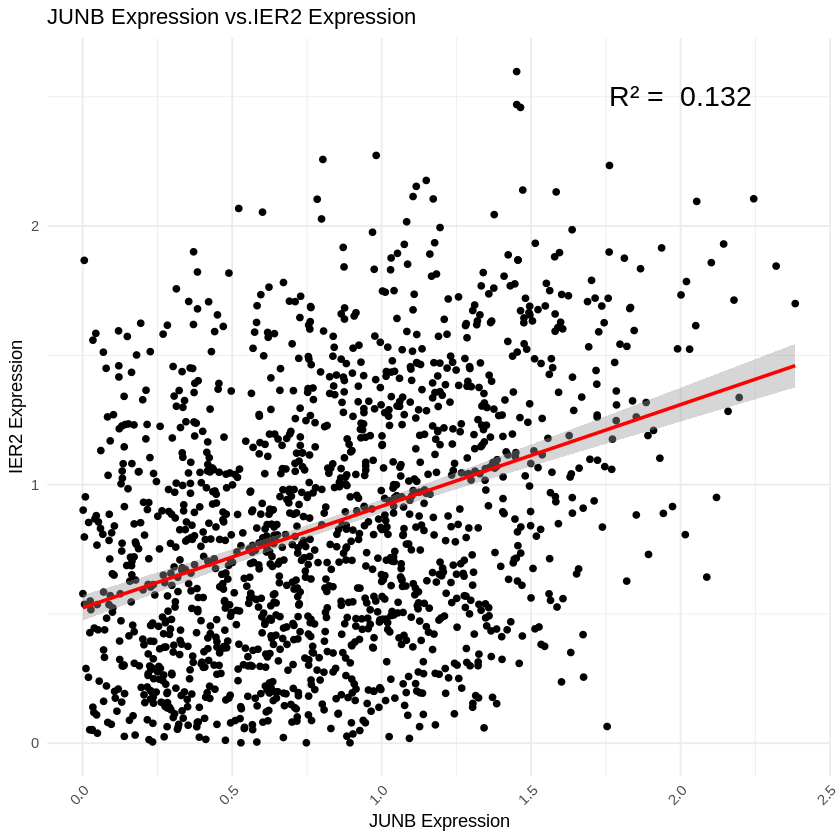

In [58]:
r_squared <- summary(model)$r.squared

geneexpression<- geneexpression + annotate("text", x = 2, y = 2.5, label = paste("R² = ", round(r_squared,3)), size=6)
geneexpression


**7.Colour the points by disease stage or tissue type**


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


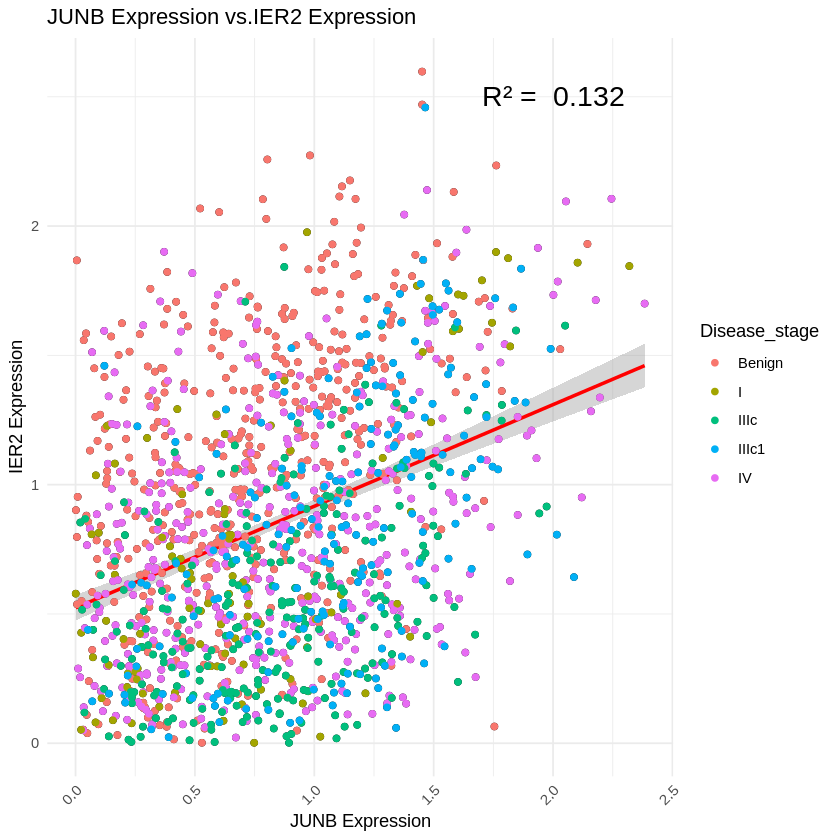

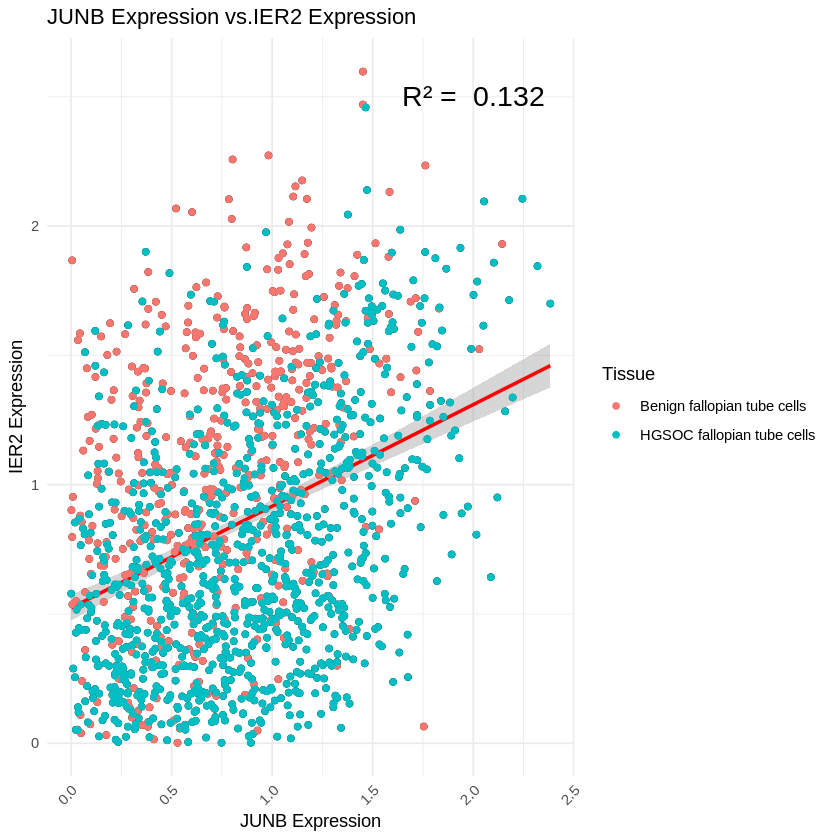

In [59]:
stagegeneexpression<- geneexpression + geom_point(aes(color=Disease_stage))
stagegeneexpression

tissuegeneexpression<- geneexpression + geom_point(aes(color=Tissue))
tissuegeneexpression

##**Correlate several genes against eachother using a correlation matrix**

**1. Remove values with a standard deviation of 0, as this will break the correlation matrix**

In [60]:
secretoryexp<- secretoryexp[,apply(secretoryexp,2, sd) > 0]

**2. Correlate genes against eachother**

In [61]:
cordata<-cor(secretoryexp [colnames(secretoryexp)],
             secretoryexp[colnames(secretoryexp)])

**3. Plot a heatmap of the correlation matrix of genes with a correlation score of >0.6**
* Define the genes with a correlation score of >0.6
* Subset the correlation matrix to these genes only
* Plot as a heatmap

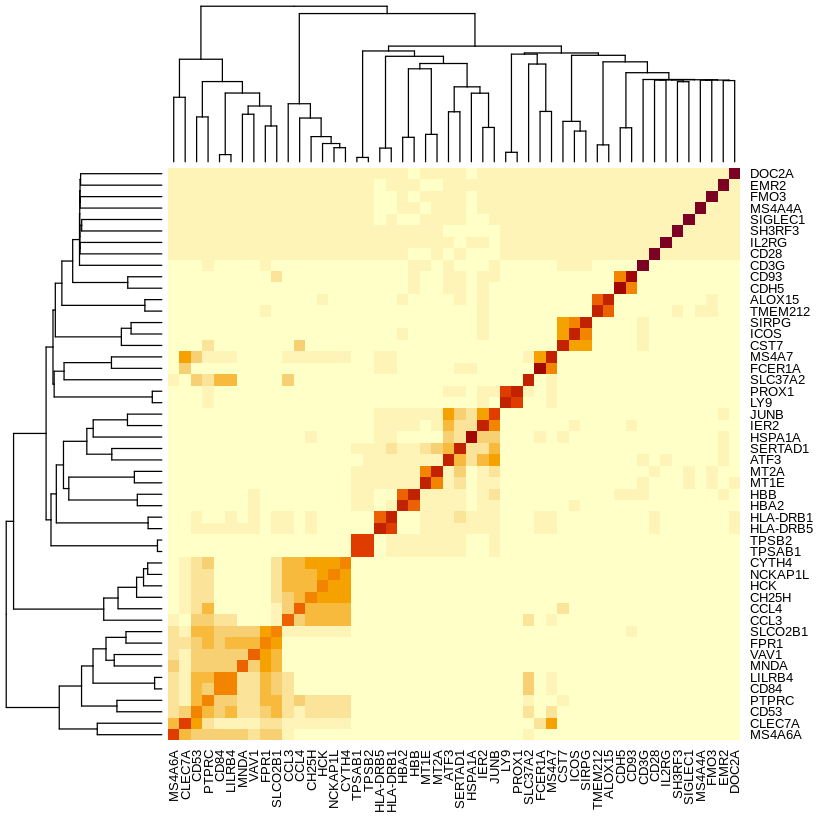

In [62]:
upper_tri <- upper.tri(cordata)
high_corr<-which(upper_tri & cordata>0.6, arr.ind=TRUE)

corrplot <- cordata[rownames(cordata) %in% rownames(high_corr),]
corrplot <- corrplot[,colnames(corrplot) %in% rownames(high_corr)]

heatmap(corrplot)
